<a href="https://colab.research.google.com/github/146790g/BreakHis-VGG16/blob/master/BreakHis_VGG16_5_multiple_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 深層学習 VGG16モデルを用いた乳がん染色画像（BreakHis）の解析
#（その４ : 特徴量に基づくクラスタリング ）
# Deep Learning for Magnification Independent Breast Cancer Histopathology

<br>

# Image Classification using VGG16 Model - Image Feature Extraction
# and Multiple Clustering 

<br>


<h2>対象データは、こちらをクリック ☞　</>
<a href='https://www.kaggle.com/ambarish/breakhis'>Kaggle BreakHis Data</a>

４つのMagnification levelのデータをすべて合算して、解析する

<br>

## 4 Magnification Levels: ×40, ×100, ×200, ×400


During analysis and annotation, pathologists starts by identifying ROIs in
the lowest magnification level slide (×40), then dives deeper in the latter using higher magnification levels (×100, ×200) until having a profound insight
(×400). 

<br>

## データ数 の概要

・Training Data: 5026 images <br>
  -- Benign Data: 1472 images <br>
  -- Mallignant Data: 3554 images 

・Validation Data: 2904 images <br>
  -- Benign Data: 1008 images <br>
  -- Mallignant Data:1896 images <br>

## Data Set Details by Magnification levels.

 ×40 : <br>
×100 : <br>
×200 : <br>
×400 : <br>

In [ ]:
%tensorflow_version 2.x

In [ ]:
%pwd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls -lh '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data'

total 8.0K
drwx------ 2 root root 4.0K Jul 21 03:42 train
drwx------ 2 root root 4.0K Jul 27 01:49 validation


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import MeanShift, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import mixture
from sklearn.cluster import MeanShift, estimate_bandwidth
import pickle
import pandas as pd
import numpy as np
    


# 第７章 特徴データに基づくクラスタリング


### 特徴量データを読み込む

In [ ]:
train_data_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data/train' # 訓練データのフォルダー
validation_data_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data/validation' # テストデータのフォルダー
result_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/results'        # VGG19の出力結果を保存するフォルダー
test_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/test'
    


import os
import pickle

result_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/results'        # VGG16の出力結果を保存するフォルダー


with open(os.path.join(result_dir,'vgg16feature.pickle'),'rb') as web:
  dat=pickle.load(web)

print(dat)




          0         1    2         3    ...       252       253       254  255
0    1.433194  0.237343  0.0  0.000000  ...  0.124101  0.433003  0.365921  0.0
1    1.009185  0.000000  0.0  0.689157  ...  0.280792  0.000000  0.000000  0.0
2    0.289563  0.000000  0.0  0.000000  ...  0.175480  0.643338  0.717072  0.0
3    0.583612  0.000000  0.0  0.263637  ...  0.922542  0.755323  0.765121  0.0
4    0.000000  0.000000  0.0  0.096608  ...  0.883193  1.501190  1.697194  0.0
..        ...       ...  ...       ...  ...       ...       ...       ...  ...
167  2.064936  0.696829  0.0  0.000000  ...  0.000000  0.000000  0.000000  0.0
168  1.648822  0.000000  0.0  0.000000  ...  0.000000  0.021108  0.000000  0.0
169  1.507757  0.959236  0.0  0.435809  ...  0.655173  0.000000  0.000000  0.0
170  2.536943  1.333277  0.0  0.000000  ...  0.000000  0.000000  0.000000  0.0
171  1.254399  0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000  0.0

[172 rows x 256 columns]


## k-means, meanshift, GMM model を設定する。スケーリング因子も設定する。

In [ ]:

bandwidth = estimate_bandwidth(dat)

km = KMeans(n_clusters=2)
ms = MeanShift(bandwidth=bandwidth)
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
pca=PCA(n_components=5)

pipe_km = Pipeline([("scaler", StandardScaler()), 
                    ('pca',PCA(n_components=5)),
                    ("kmeans", KMeans(n_clusters=2))])

pipe_ms = Pipeline([("scaler", StandardScaler()),
                    ('pca',PCA(n_components=5)),
                    ("meanshift", MeanShift(bandwidth=bandwidth))])

pipe_gmm = Pipeline([("scaler", StandardScaler()),
                    ('pca',PCA(n_components=5)),
                    ("gmm",gmm)])


pcax = pca.fit_transform(dat)

print(pcax[:10])

[[ 8.9924037e-01 -3.7195258e+00 -1.6595007e+00  8.3897847e-01
  -6.7673939e-01]
 [-4.6567473e+00 -3.8280518e+00  3.6941352e+00  1.6002512e+00
   4.1683403e-01]
 [-9.6450996e+00 -3.4836051e+00  7.8010249e-01  7.2020066e-01
   2.6818771e+00]
 [-8.2861633e+00 -1.3156345e+00  2.7243739e-01  8.6074120e-01
   4.0813997e-01]
 [-1.3986618e+01  2.3027096e+00 -1.2943298e+00 -6.1216366e-02
   1.5876201e+00]
 [-2.0031927e+01  1.6099262e+01 -6.5981731e+00 -1.2210579e+00
  -3.3183124e+00]
 [-3.6579359e+00 -2.5660095e+00 -2.5536096e+00  2.5678268e-01
  -4.9494374e-01]
 [-1.0268715e+01 -2.0007910e-01  2.5882152e-01  7.1067077e-01
   8.4597182e-01]
 [-9.2287025e+00 -2.0204234e+00 -1.0701029e+00  1.6350238e-02
   1.6151890e+00]
 [-1.6127163e+01  7.9636717e+00  7.9779679e-01  1.5924394e+00
  -1.0942017e+00]]


## ラベルデータを構築する

In [ ]:

l1 = [0] * 78
l2= [1]*94
label=l1+l2

labeld=np.array(label)

print(labeld[:10])

[0 0 0 0 0 0 0 0 0 0]


## Model Fitting

In [ ]:
# model fitting
        
km_y = km.fit_predict(dat)
ms_y = ms.fit_predict(dat)
gmm_y= gmm.fit_predict(dat)
        
p_km_y = pipe_km.fit_predict(dat)
p_ms_y = pipe_ms.fit_predict(dat)
p_gmm_y= pipe_gmm.fit_predict(dat)

## PC1 vs PC2 プロット

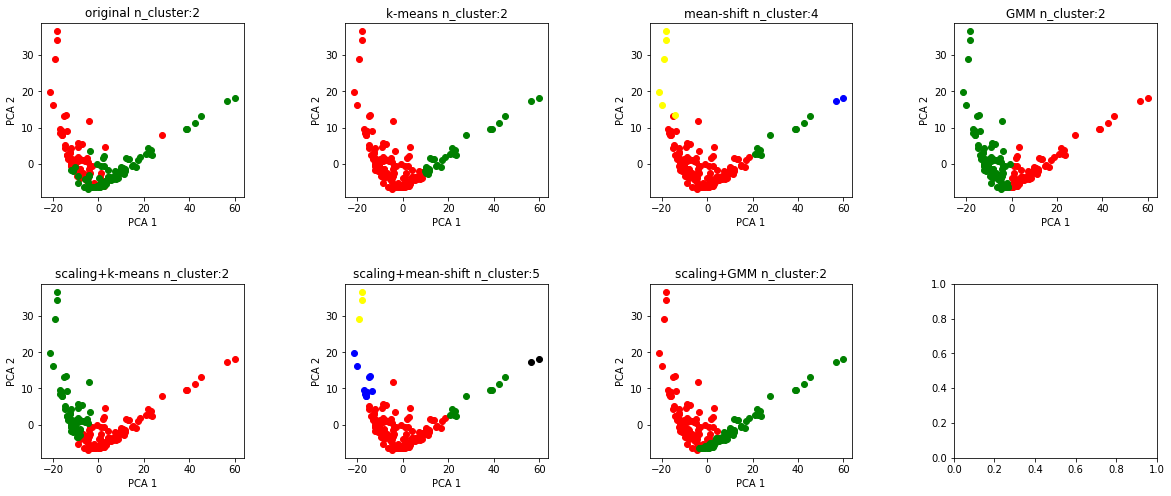

In [ ]:

n_clusters = [2, 
              2, 
              ms.cluster_centers_.shape[0],
              2,
              2,
              pipe_ms.named_steps.meanshift.cluster_centers_.shape[0],
              2]


# figure

 
# PC1 vs PC2

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axes = axes.ravel()

colors=['red','green','yellow','blue','black']

for i, (y, name, n_cluster) in enumerate(
                zip([labeld, km_y, ms_y, gmm_y, p_km_y, p_ms_y, p_gmm_y], 
                    ["original", "k-means", "mean-shift","GMM","scaling+k-means", "scaling+mean-shift","scaling+GMM"],
                    n_clusters)):
    
    for target in range(n_cluster):
        axes[i].scatter(pcax[y==target,0],pcax[y==target,1],c=colors[target])
        axes[i].set_title("{0} n_cluster:{1}".format(name, n_cluster))
        axes[i].set_xlabel('PCA 1')
        axes[i].set_ylabel('PCA 2')


## PC1 vs PC3 プロット

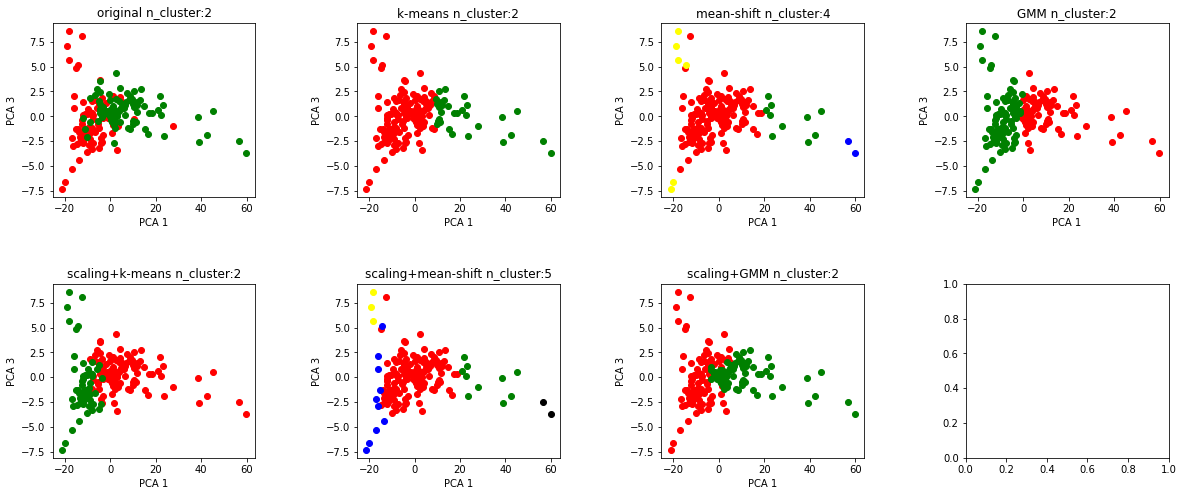

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axes = axes.ravel()

colors=['red','green','yellow','blue','black']

for i, (y, name, n_cluster) in enumerate(
                zip([labeld, km_y, ms_y, gmm_y, p_km_y, p_ms_y, p_gmm_y], 
                    ["original", "k-means", "mean-shift","GMM","scaling+k-means", "scaling+mean-shift","scaling+GMM"],
                    n_clusters)):
    
    for target in range(n_cluster):
        axes[i].scatter(pcax[y==target,0],pcax[y==target,2],c=colors[target])
        axes[i].set_title("{0} n_cluster:{1}".format(name, n_cluster))
        axes[i].set_xlabel('PCA 1')
        axes[i].set_ylabel('PCA 3')


# 【考察】

##特徴量データに基づいて、クラスタリングを行った。スケーリングの前処理を行い、次に、k-means法によって分類する方法が、もっとも、真値に近いことが示された。また、このクラスタリングにより、VGG16モデルによる特徴量の抽出が適切にできていることが示された。